In [74]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, MaxPool2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
%matplotlib inline 

In [3]:
train_set = pd.read_csv('Messidor Dataset/train.csv')    # reading the csv file
train_set.head() 

,Image,Id,Risk of macular edema
0,20051213_62188_0100_PP.tif,2,0
1,20051020_62615_0100_PP.tif,2,0
2,20051202_41238_0400_PP.tif,1,0
3,20060522_45455_0100_PP.tif,2,0
4,20060530_36895_0100_PP.tif,3,2


In [27]:
type(train_set['Image'][0])

str

In [4]:
train_image = []

for i in tqdm(range(train_set.shape[0])):
    img = image.load_img('Messidor Dataset/train/' + train_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████████| 960/960 [01:03<00:00, 15.08it/s]


In [5]:
print(X.shape)

DR_grade = train_set['Id'].tolist()
print(len(DR_grade))
Macular_Edema = train_set['Risk of macular edema '].tolist()
print(len(Macular_Edema))

(960, 224, 224, 3)
960
960


1
0


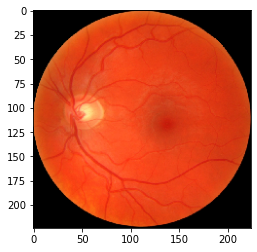

In [7]:
plt.imshow(X[2])
print(DR_grade[2])
print(Macular_Edema[2])

In [6]:
len(train_image)

960

In [8]:
aug_train_label = pd.read_csv('Messidor Dataset/train_aug_label.csv')
aug_train_label.head()

,Image,Id,Risk of macular edema


In [26]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

DR_list = []
Edema_list = []

for i in range(len(X)):
    img = X[i] 
    grade = DR_grade[i]
    edema = Macular_Edema[i]
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)  

    j = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='Messidor Dataset/aug_train', save_prefix=train_set['Image'][i],save_format='tif'):
        
        DR_list.append(grade)
        Edema_list.append(edema)
        j += 1
        if j > 5:
            break 


In [24]:
print(len(DR_list))
print(len(Edema_list))

20160
20160


In [62]:
import os

Image_DR=os.listdir(r"Messidor Dataset/aug_train")
print (len(file_list))

5760


In [63]:
column_name = ['Image','Id','Risk of Macular Edema']

In [64]:
print(type(Image_DR[0]))

<class 'str'>


In [65]:
intermediate_list = [Image_DR,DR_list,Edema_list]

In [66]:
len(intermediate_list)
len(intermediate_list[0])

5760

In [67]:
len(intermediate_list[1])

5760

In [68]:
len(intermediate_list[2])

5760

In [69]:
res = [list(x) for x in zip(*intermediate_list)]

In [70]:
res.insert(0,column_name)
res

[['Image', 'Id', 'Risk of Macular Edema'],
 ['20051019_38557_0100_PP.tif_0_1898.tif', 2, 0],
 ['20051019_38557_0100_PP.tif_0_3322.tif', 2, 0],
 ['20051019_38557_0100_PP.tif_0_4844.tif', 2, 0],
 ['20051019_38557_0100_PP.tif_0_5319.tif', 2, 0],
 ['20051019_38557_0100_PP.tif_0_687.tif', 2, 0],
 ['20051019_38557_0100_PP.tif_0_9094.tif', 2, 0],
 ['20051020_43808_0100_PP.tif_0_2330.tif', 2, 0],
 ['20051020_43808_0100_PP.tif_0_2798.tif', 2, 0],
 ['20051020_43808_0100_PP.tif_0_6269.tif', 2, 0],
 ['20051020_43808_0100_PP.tif_0_8334.tif', 2, 0],
 ['20051020_43808_0100_PP.tif_0_8820.tif', 2, 0],
 ['20051020_43808_0100_PP.tif_0_9448.tif', 2, 0],
 ['20051020_43832_0100_PP.tif_0_1756.tif', 1, 0],
 ['20051020_43832_0100_PP.tif_0_2506.tif', 1, 0],
 ['20051020_43832_0100_PP.tif_0_2964.tif', 1, 0],
 ['20051020_43832_0100_PP.tif_0_6725.tif', 1, 0],
 ['20051020_43832_0100_PP.tif_0_6814.tif', 1, 0],
 ['20051020_43832_0100_PP.tif_0_8633.tif', 1, 0],
 ['20051020_43882_0100_PP.tif_0_130.tif', 2, 0],
 ['200510

In [71]:
new_df = pd.DataFrame(res)

In [72]:
print(new_df)

                                          0   1                      2
0                                     Image  Id  Risk of Macular Edema
1     20051019_38557_0100_PP.tif_0_1898.tif   2                      0
2     20051019_38557_0100_PP.tif_0_3322.tif   2                      0
3     20051019_38557_0100_PP.tif_0_4844.tif   2                      0
4     20051019_38557_0100_PP.tif_0_5319.tif   2                      0
...                                     ...  ..                    ...
5756  20060530_55837_0100_PP.tif_0_4080.tif   2                      0
5757  20060530_55837_0100_PP.tif_0_4341.tif   2                      0
5758  20060530_55837_0100_PP.tif_0_7718.tif   2                      0
5759  20060530_55837_0100_PP.tif_0_8042.tif   2                      0
5760  20060530_55837_0100_PP.tif_0_8471.tif   2                      0

[5761 rows x 3 columns]


In [73]:
new_df.to_csv('aug_train_label.csv', index=False, header=False)